# Feature pre-processing
#### Numerical Features
'id', 'scrape_id', 'host_id', 'host_response_rate', 'host_acceptance_rate', 'host_listings_count', 
'host_total_listings_count','latitude', 'longitude', 'accommodates', 'bedrooms', 'beds', 'price',
'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights',
'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 
'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews',
'number_of_reviews_ltm','number_of_reviews_l30d','review_scores_rating','review_scores_accuracy',
'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 
'review_scores_value','calculated_host_listings_count', 'calculated_host_listings_count_entire_homes',
'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms','reviews_per_month'

#### Categorical Features
'source', 'host_response_time', 'host_is_superhost', 'host_neighbourhood', 'host_has_profile_pic', 
'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 
'property_type','room_type', 'has_availability', 'instant_bookable', 'host_location'

#### Date Features
'last_scraped', 'host_since', 'calendar_last_scraped', 'first_review', 'last_review'

#### Text Features
'listing_url', 'name', 'description', 'neighbourhood_overview', 'picture_url', 
'host_url', 'host_name', 'host_about', 'hosr_thumbnail_url', 'host_picture_url', 
'host_verifications', 'bathrooms_text', 'amenities'

#### Empty Columns
'calendar_updated', 'bathrooms'

#### Dummu Column
'license'

In [60]:
import pandas as pd
data = pd.read_csv('listings.csv')
airbnb = pd.read_csv('airbnb_4.csv')
# Merge the two dataframes based on the 'id' column, concatenate 3 new features
merged_df = pd.merge(data, airbnb[['id', 'average_nearest_price', 'within_radius', 'bus_radius']], on='id')

In [61]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4887 entries, 0 to 4886
Data columns (total 78 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            4887 non-null   int64  
 1   listing_url                                   4887 non-null   object 
 2   scrape_id                                     4887 non-null   int64  
 3   last_scraped                                  4887 non-null   object 
 4   source                                        4887 non-null   object 
 5   name                                          4887 non-null   object 
 6   description                                   4866 non-null   object 
 7   neighborhood_overview                         3422 non-null   object 
 8   picture_url                                   4887 non-null   object 
 9   host_id                                       4887 non-null   i

### Since we face to new host, we select the features that is relevant to the feature price, ignored empty columns, identification features (id, name, etc.), high correlated featurs (host_listings_count, minimum_minimum_nights, etc), and past experience features, etc.

In [62]:
# 19 selected features
columns = ['latitude', 'longitude', 'host_total_listings_count','host_has_profile_pic', 
           'host_identity_verified','neighbourhood_cleansed', 'property_type', 'room_type', 
           'accommodates', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights', 
           'maximum_nights', 'has_availability', 'instant_bookable', 'calculated_host_listings_count', 
            'average_nearest_price', 'within_radius', 'bus_radius']
df = merged_df[columns].copy()

# Data Pre-processing

### 1. Count the number of NA in each column, and drop all rows have NA.

In [63]:
def count_na_by_column(data):
    for column in data.columns:
        print(column + ":", data[column].isna().sum())
count_na_by_column(df)
df = df.dropna()

latitude: 0
longitude: 0
host_total_listings_count: 0
host_has_profile_pic: 0
host_identity_verified: 0
neighbourhood_cleansed: 0
property_type: 0
room_type: 0
accommodates: 0
bathrooms_text: 2
bedrooms: 299
beds: 44
amenities: 0
price: 0
minimum_nights: 0
maximum_nights: 0
has_availability: 0
instant_bookable: 0
calculated_host_listings_count: 0
average_nearest_price: 5
within_radius: 0
bus_radius: 0


In [64]:
df.isnull().sum()

latitude                          0
longitude                         0
host_total_listings_count         0
host_has_profile_pic              0
host_identity_verified            0
neighbourhood_cleansed            0
property_type                     0
room_type                         0
accommodates                      0
bathrooms_text                    0
bedrooms                          0
beds                              0
amenities                         0
price                             0
minimum_nights                    0
maximum_nights                    0
has_availability                  0
instant_bookable                  0
calculated_host_listings_count    0
average_nearest_price             0
within_radius                     0
bus_radius                        0
dtype: int64

### 2. Convert the price to numeric values

In [65]:
def prices_to_numbers (price_string):
    price_numeric = float(str(price_string).replace(',', '').split('$')[-1])
    return price_numeric
df['price'] = df['price'].apply(prices_to_numbers)
df.price.head(2)

0    157.0
1    150.0
Name: price, dtype: float64

### 3. Convert bool value to numeric.

In [66]:
from sklearn.preprocessing import LabelEncoder
boolean_cols = ['host_has_profile_pic',
               'host_identity_verified',
               'has_availability',
               'instant_bookable',
               'within_radius',
               'bus_radius']

le = LabelEncoder()

for col in boolean_cols:
    col_encoded = le.fit_transform(df[col])
    df[col] = le.fit_transform(df[col])
df.head(2)

latitude  longitude  host_total_listings_count  host_has_profile_pic  \
0  49.28201 -123.12669                          1                     1   
1  49.25622 -123.06607                          5                     1   

   host_identity_verified    neighbourhood_cleansed       property_type  \
0                       1                  West End        Entire condo   
1                       1  Kensington-Cedar Cottage  Entire rental unit   

         room_type  accommodates bathrooms_text  ...  \
0  Entire home/apt             2         1 bath  ...   
1  Entire home/apt             2         1 bath  ...   

                                           amenities  price minimum_nights  \
0  ["Freezer", "Heating", "Toaster", "Extra pillo...  157.0              2   
1  ["Freezer", "Books and reading material", "Pri...  150.0             30   

   maximum_nights  has_availability  instant_bookable  \
0              90                 1                 0   
1             180                 1                 0   

   calculated_host_listings_count  average_nearest_price  within_radius  \
0                               1               594340.0              1   
1                               1              1478380.0              1   

   bus_radius  
0           1  
1           0  

[2 rows x 22 columns]

### 4. Extract all kind of amenities from the text, create new amenity boolean features.

In [67]:
all_amenities = []
amenities_list = df.amenities.unique()

for i in range(len(amenities_list)):
    amenities = amenities_list[i].split(",")
    for ft in amenities:
        for amen in ft.split('"'):
            if amen != "[" and amen != "]" and amen not in all_amenities:
                all_amenities.append(amen)

We manually selected a few hot amenities to create new boolean features.

In [68]:
df.loc[df['amenities'].str.contains('Air conditioning|Central air conditioning'), 'air_conditioning'] = 1
df.loc[df['amenities'].str.contains('Amazon Echo|Apple TV|Game console|Netflix|Projector and screen|Smart TV'), 'high_end_electronics'] = 1
df.loc[df['amenities'].str.contains('BBQ grill|Fire pit|Propane barbeque'), 'bbq'] = 1
df.loc[df['amenities'].str.contains('Balcony|Patio'), 'balcony'] = 1
df.loc[df['amenities'].str.contains('Beach view|Beachfront|Lake access|Mountain view|Ski-in/Ski-out|Waterfront'), 'nature_and_views'] = 1
df.loc[df['amenities'].str.contains('Bed linens'), 'bed_linen'] = 1
df.loc[df['amenities'].str.contains('Breakfast'), 'breakfast'] = 1
df.loc[df['amenities'].str.contains('TV'), 'tv'] = 1
df.loc[df['amenities'].str.contains('Coffee maker|Espresso machine'), 'coffee_machine'] = 1
df.loc[df['amenities'].str.contains('Cooking basics'), 'cooking_basics'] = 1
df.loc[df['amenities'].str.contains('Dishwasher|Dryer|Washer'), 'white_goods'] = 1
df.loc[df['amenities'].str.contains('Elevator'), 'elevator'] = 1
df.loc[df['amenities'].str.contains('Exercise equipment|Gym|gym'), 'gym'] = 1
df.loc[df['amenities'].str.contains('Family/kid friendly|Children|children'), 'child_friendly'] = 1
df.loc[df['amenities'].str.contains('parking'), 'parking'] = 1
df.loc[df['amenities'].str.contains('Garden|Outdoor|Sun loungers|Terrace'), 'outdoor_space'] = 1
df.loc[df['amenities'].str.contains('Host greets you'), 'host_greeting'] = 1
df.loc[df['amenities'].str.contains('Hot tub|Jetted tub|hot tub|Sauna|Pool|pool'), 'hot_tub_sauna_or_pool'] = 1
df.loc[df['amenities'].str.contains('Internet|Pocket wifi|Wifi'), 'internet'] = 1
df.loc[df['amenities'].str.contains('Long term stays allowed'), 'long_term_stays'] = 1
df.loc[df['amenities'].str.contains('Pets|pet|Cat(s)|Dog(s)'), 'pets_allowed'] = 1
df.loc[df['amenities'].str.contains('Private entrance'), 'private_entrance'] = 1
df.loc[df['amenities'].str.contains('Safe|Security system'), 'secure'] = 1
df.loc[df['amenities'].str.contains('Smoking allowed'), 'smoking_allowed'] = 1
#df.loc[df['amenities'].str.contains('Suitable for events'), 'event_suitable'] = 1

/var/folders/rb/s76jzs2d40d1vjh8ksby4ftc0000gn/T/ipykernel_16338/2902660134.py:21: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df.loc[df['amenities'].str.contains('Pets|pet|Cat(s)|Dog(s)'), 'pets_allowed'] = 1


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4549 entries, 0 to 4886
Data columns (total 46 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   latitude                        4549 non-null   float64
 1   longitude                       4549 non-null   float64
 2   host_total_listings_count       4549 non-null   int64  
 3   host_has_profile_pic            4549 non-null   int64  
 4   host_identity_verified          4549 non-null   int64  
 5   neighbourhood_cleansed          4549 non-null   object 
 6   property_type                   4549 non-null   object 
 7   room_type                       4549 non-null   object 
 8   accommodates                    4549 non-null   int64  
 9   bathrooms_text                  4549 non-null   object 
 10  bedrooms                        4549 non-null   float64
 11  beds                            4549 non-null   float64
 12  amenities                       45

Replacing nulls with zeros for new columns

In [70]:
cols_to_replace_nulls = df.iloc[:,22:].columns
df[cols_to_replace_nulls] = df[cols_to_replace_nulls].fillna(0)

Next, we view the value set for all new columns

In [71]:
def printValuesForEachColumn(data):
    for amenity_column in data.columns[19:]:
        print(amenity_column, set(data[amenity_column]))
printValuesForEachColumn(df)

average_nearest_price {1024000.0, 614400.0, 2375680.0, 2441220.0, 1851400.0, 1933320.0, 1032201.2, 2408460.0, 1343500.0, 835600.0, 1531920.0, 1409040.0, 1040400.0, 573460.0, 2072600.0, 2031640.0, 1581080.0, 1318940.0, 1261600.0, 1531940.0, 655400.0, 2089000.0, 925740.0, 868400.0, 2588720.0, 1278000.0, 2302000.0, 483380.0, 1687600.0, 1261620.0, 876600.0, 1474620.0, 1884220.0, 1925180.0, 2482240.0, 2113600.0, 1826880.0, 884800.0, 1630280.0, 1572940.0, 1327180.0, 1106000.0, 1376340.0, 2343000.0, 499800.0, 1278040.0, 909400.0, 1572955.2, 1532000.0, 3989600.0, 876640.0, 1122400.0, 721000.0, 2482280.0, 925800.0, 1949800.0, 3940460.0, 1646700.0, 1343600.0, 1368180.0, 548980.0, 2515060.0, 2924660.0, 1638520.0, 2171000.0, 2392180.0, 1572980.0, 1532020.0, 1360000.0, 565380.0, 1859720.0, 1573000.0, 753800.0, 1171600.0, 2605200.0, 1179800.0, 1794200.0, 3023000.0, 1802400.0, 778400.0, 983200.0, 1597600.0, 639140.0, 2056360.0, 3121320.0, 3039400.0, 3145900.0, 3457200.0, 1204400.0, 1679540.0, 803000.

We did not observe any column contains a single value only.

Dropping the original amenities column

In [72]:
df.drop('amenities', axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4549 entries, 0 to 4886
Data columns (total 45 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   latitude                        4549 non-null   float64
 1   longitude                       4549 non-null   float64
 2   host_total_listings_count       4549 non-null   int64  
 3   host_has_profile_pic            4549 non-null   int64  
 4   host_identity_verified          4549 non-null   int64  
 5   neighbourhood_cleansed          4549 non-null   object 
 6   property_type                   4549 non-null   object 
 7   room_type                       4549 non-null   object 
 8   accommodates                    4549 non-null   int64  
 9   bathrooms_text                  4549 non-null   object 
 10  bedrooms                        4549 non-null   float64
 11  beds                            4549 non-null   float64
 12  price                           45

### 5. Displays the property type of listings

In [73]:
property_type_counts = df.property_type.value_counts()
property_type_counts

Entire condo                          1257
Entire rental unit                     828
Entire home                            734
Entire guest suite                     554
Private room in home                   460
Entire loft                            125
Private room in rental unit             95
Entire townhouse                        94
Private room in condo                   78
Entire guesthouse                       62
Entire serviced apartment               58
Private room in villa                   31
Private room in townhouse               24
Private room in guest suite             20
Entire villa                            15
Private room in bed and breakfast       13
Entire bungalow                         10
Room in boutique hotel                   9
Room in aparthotel                       6
Entire place                             6
Shared room in hostel                    5
Entire vacation home                     5
Entire timeshare                         5
Shared room

Grouping property types whose low counts might be insignificant and not provide us with enough information.
Thus, grouping property types that have counts that are < 20 into 'Other'.

In [74]:
df.loc[df.property_type.isin(property_type_counts[property_type_counts<20].keys()), 'property_type'] = 'Other'
df.property_type.value_counts()

Entire condo                   1257
Entire rental unit              828
Entire home                     734
Entire guest suite              554
Private room in home            460
Other                           129
Entire loft                     125
Private room in rental unit      95
Entire townhouse                 94
Private room in condo            78
Entire guesthouse                62
Entire serviced apartment        58
Private room in villa            31
Private room in townhouse        24
Private room in guest suite      20
Name: property_type, dtype: int64

### 6. Extract the features of bathrooms number and bathroom type from the text column 'bathrooms_text'

In [75]:
list(set(df.bathrooms_text))[0:10]

['5 baths',
 '3 baths',
 '3 shared baths',
 '1 shared bath',
 '2.5 shared baths',
 '0 baths',
 '4 baths',
 '2 shared baths',
 '3.5 shared baths',
 '2 baths']

In [76]:
def convertBathrooms(row):  
    if 'private' in row['bathrooms_text'].lower():
        return 'private'
    elif 'shared' in row['bathrooms_text'].lower():
        return 'shared'
    return 'unknown'

df['bathrooms_type'] = df.apply(lambda row: convertBathrooms(row), axis=1)
df.bathrooms_type.value_counts()

unknown    3843
shared      415
private     291
Name: bathrooms_type, dtype: int64

Now we extract the bathroom number

In [77]:
def calculateBathroomNum(row):  
    if 'half' in row['bathrooms_text'].lower() or 'Half' in row['bathrooms_text'].lower():
        return 0.5
    return float(row['bathrooms_text'].split(" ")[0])

df['bathrooms_number'] = df.apply(lambda row: calculateBathroomNum(row), axis=1)
df.bathrooms_number.value_counts()

1.0    3261
2.0     814
1.5     211
2.5     141
3.0      57
3.5      28
4.0      15
4.5       6
0.0       4
5.0       4
0.5       4
6.0       2
7.0       2
Name: bathrooms_number, dtype: int64

Drop the original column 'bathrooms_text'

In [78]:
df.drop('bathrooms_text', axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4549 entries, 0 to 4886
Data columns (total 46 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   latitude                        4549 non-null   float64
 1   longitude                       4549 non-null   float64
 2   host_total_listings_count       4549 non-null   int64  
 3   host_has_profile_pic            4549 non-null   int64  
 4   host_identity_verified          4549 non-null   int64  
 5   neighbourhood_cleansed          4549 non-null   object 
 6   property_type                   4549 non-null   object 
 7   room_type                       4549 non-null   object 
 8   accommodates                    4549 non-null   int64  
 9   bedrooms                        4549 non-null   float64
 10  beds                            4549 non-null   float64
 11  price                           4549 non-null   float64
 12  minimum_nights                  45

### 7. Encode other categorical features.

In [79]:
df['neighbourhood_cleansed'] = pd.factorize(df['neighbourhood_cleansed'])[0]
df['property_type'] = pd.factorize(df['property_type'])[0]
df['room_type'] = pd.factorize(df['room_type'])[0]
df['bathrooms_type'] = pd.factorize(df['bathrooms_type'])[0]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4549 entries, 0 to 4886
Data columns (total 46 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   latitude                        4549 non-null   float64
 1   longitude                       4549 non-null   float64
 2   host_total_listings_count       4549 non-null   int64  
 3   host_has_profile_pic            4549 non-null   int64  
 4   host_identity_verified          4549 non-null   int64  
 5   neighbourhood_cleansed          4549 non-null   int64  
 6   property_type                   4549 non-null   int64  
 7   room_type                       4549 non-null   int64  
 8   accommodates                    4549 non-null   int64  
 9   bedrooms                        4549 non-null   float64
 10  beds                            4549 non-null   float64
 11  price                           4549 non-null   float64
 12  minimum_nights                  45

# Model fitting

Tree regression is a technique that is bale to perform both regression and classification task with decision tree. Since our dataset contains 30+ categorical variables, we choose to use the tree regressor becuase it potentially more friendly with categorical variables.

#### Random Forest

Random Forest is an emsemble technique that is able to perform Regression tasks with the use of multiple decision trees and a technique that is called Bootstrap aggregation (Bagging). The idea behind this technique is to combine multiple results of decision trees in its prediction rather than replying on individual decision trees, thus reduces the variance.

In [80]:
df = df[df.price < 600]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4523 entries, 0 to 4886
Data columns (total 46 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   latitude                        4523 non-null   float64
 1   longitude                       4523 non-null   float64
 2   host_total_listings_count       4523 non-null   int64  
 3   host_has_profile_pic            4523 non-null   int64  
 4   host_identity_verified          4523 non-null   int64  
 5   neighbourhood_cleansed          4523 non-null   int64  
 6   property_type                   4523 non-null   int64  
 7   room_type                       4523 non-null   int64  
 8   accommodates                    4523 non-null   int64  
 9   bedrooms                        4523 non-null   float64
 10  beds                            4523 non-null   float64
 11  price                           4523 non-null   float64
 12  minimum_nights                  45

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
X = df.loc[:, df.columns != 'price']
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, train_size = 0.75,  random_state=42)

In [82]:
# create regressor object
regressor = RandomForestRegressor()
# fit the regressor with x and y data
gb = regressor.fit(X_train, y_train)  
y_predict = regressor.predict(X_test)

In [83]:
importancesRF = regressor.feature_importances_
feat_imp1 = pd.DataFrame(importancesRF, columns=['Weight'], index=X_train.columns)
feat_imp1.sort_values('Weight', inplace=True)
feat_imp1

Weight
smoking_allowed                 0.001299
breakfast                       0.002433
secure                          0.003049
host_has_profile_pic            0.003070
has_availability                0.003117
parking                         0.003435
host_greeting                   0.003774
internet                        0.003821
elevator                        0.004051
cooking_basics                  0.004102
host_identity_verified          0.004186
bathrooms_type                  0.004536
coffee_machine                  0.004727
within_radius                   0.004751
balcony                         0.004804
private_entrance                0.005374
tv                              0.005531
bed_linen                       0.005705
pets_allowed                    0.005730
white_goods                     0.005893
bus_radius                      0.005902
instant_bookable                0.006152
long_term_stays                 0.006189
hot_tub_sauna_or_pool           0.006555
air_conditioning                0.006889
gym                             0.007249
child_friendly                  0.007308
high_end_electronics            0.008041
nature_and_views                0.008211
outdoor_space                   0.008441
calculated_host_listings_count  0.013619
bbq                             0.014645
property_type                   0.018627
neighbourhood_cleansed          0.018789
beds                            0.027167
maximum_nights                  0.028635
host_total_listings_count       0.035300
average_nearest_price           0.044836
accommodates                    0.046576
minimum_nights                  0.054958
room_type                       0.059751
latitude                        0.075062
longitude                       0.083824
bedrooms                        0.084279
bathrooms_number                0.239611

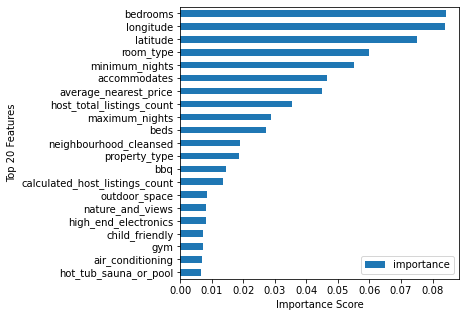

In [84]:
import matplotlib.pyplot as plt
feat_imp = pd.DataFrame({'importance':regressor.feature_importances_})  
feat_imp['feature'] = X_train.columns
feat_imp.sort_values(by='importance', ascending=False, inplace=True)

feat_imp.sort_values(by='importance', inplace=True)
feat_imp = feat_imp.set_index('feature', drop=True)
feat_imp = feat_imp[23:44]
feat_imp.plot.barh(figsize=(5,5))
plt.xlabel('Importance Score')
plt.ylabel('Top 20 Features')
plt.show()

Importance provides a score that indicates how useful or important each feature was in the construction of the decision trees within the model. The higher its relative importance, the more a variable is used to make key decisions within decision trees.

Therefore, feature importance can be used to interpret our data to understand the most important features that define our predictions. In this case, looking at the bar chart above, the predictor variable that is associated with a longer bar means that the variable has a higher importance in the Random Tree Regression Model in predicting price.

In [85]:
import math  
import sklearn.metrics
mse = sklearn.metrics.mean_squared_error(y_test, y_predict)  
mae = sklearn.metrics.mean_absolute_error(y_test, y_predict) 

rmse = math.sqrt(mse)  

print("r2 score = ", regressor.score(X_test,y_test))
print("RMSE = ", rmse)
print("MAE = ", mae)

r2 score =  0.5435571262479346
RMSE =  64.9037520575094
MAE =  44.50223902151489


In [86]:
import shap

# load JS visualization code to notebook
shap.initjs()

# use Tree SHAP explainer to explain the gradient boosting tree model
# you only need to explain and plot the first explaination
# --- Write your code below ---
explainer = shap.TreeExplainer(gb)
shap_values = explainer.shap_values(X_test)

# explain and plot the first explaination
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:])